In [20]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('final_data.csv')

Breakdown of the types of websites we have used

<AxesSubplot:ylabel='None'>

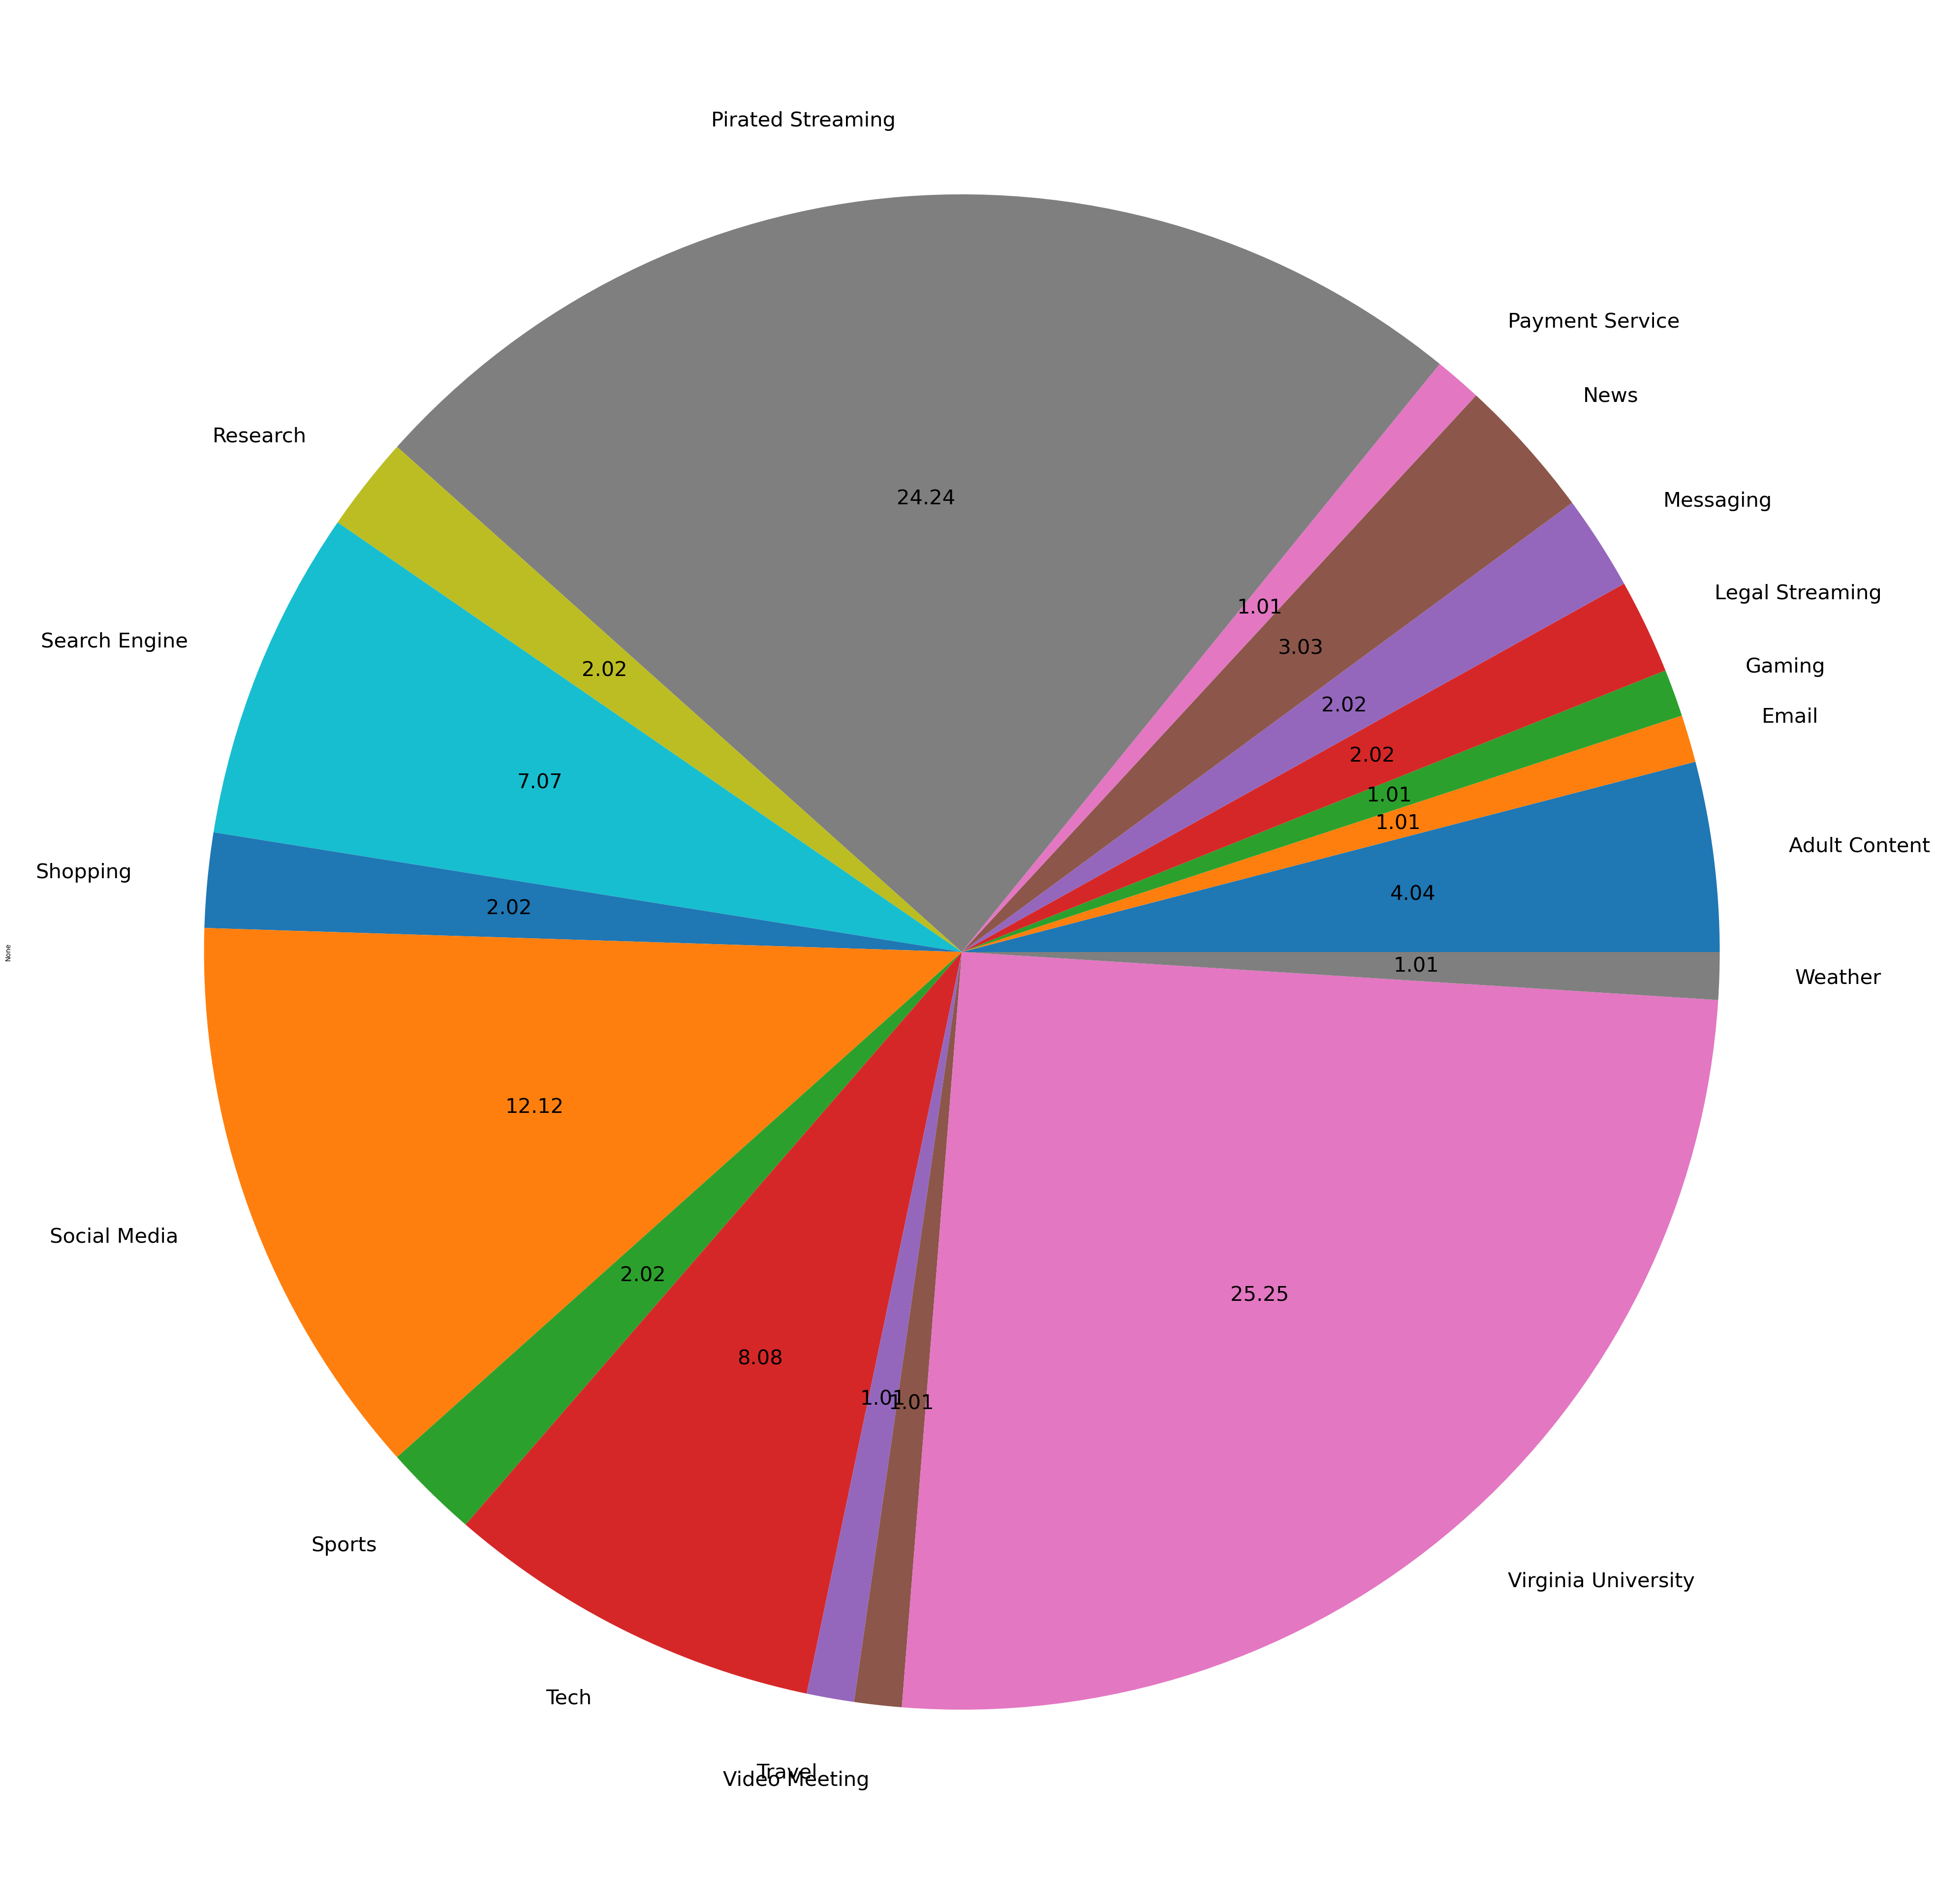

In [21]:
df.groupby('Category').size().plot(kind='pie', autopct='%.2f', figsize = (50,50), fontsize = 30)

NA Counts

In [22]:
df.isna().sum()

Domain Name                0
Category                   0
Third Party Requests       0
Ad Counts                  0
First Party Cookies       21
Third Party Cookies       21
Tracking Pixels            6
Ad Trackers                6
Fingerprint Indicators     6
dtype: int64

Text(0.5, 1.0, 'Histogram of Third Party Requests')

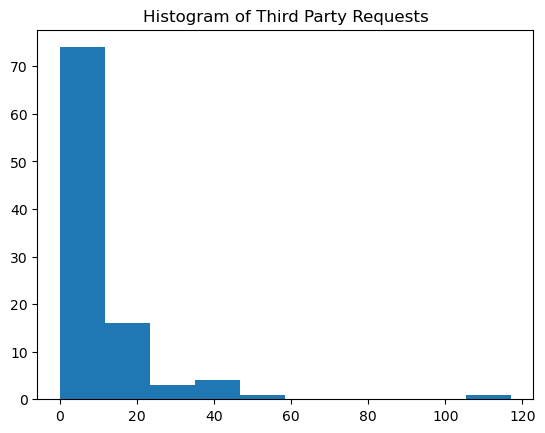

In [23]:
plt.hist(df['Third Party Requests'])
plt.title('Histogram of Third Party Requests')

Text(0.5, 1.0, 'Histogram of Ad Counts')

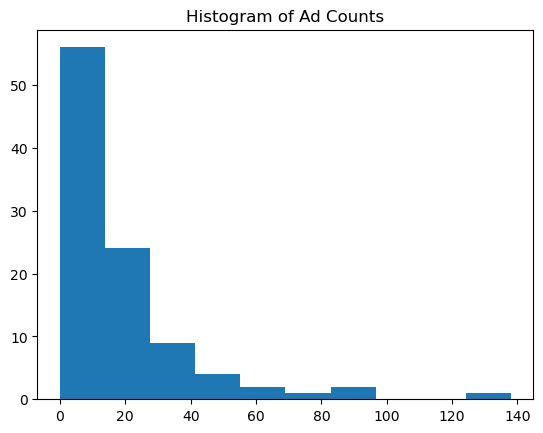

In [24]:
plt.hist(df['Ad Counts'])
plt.title('Histogram of Ad Counts')

Text(0.5, 1.0, 'Histogram of First Party Cookies')

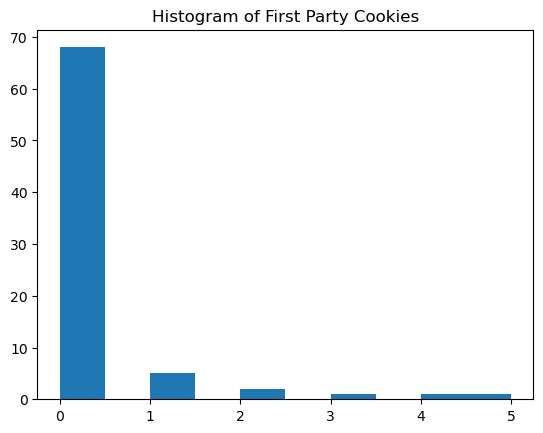

In [25]:
plt.hist(df['First Party Cookies'])
plt.title('Histogram of First Party Cookies')

Text(0.5, 1.0, 'Histogram of Third Party Cookies')

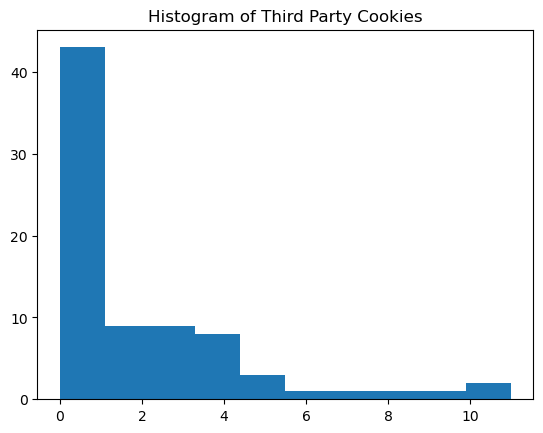

In [26]:
plt.hist(df['Third Party Cookies'])
plt.title('Histogram of Third Party Cookies')

Text(0.5, 1.0, 'Histogram of Tracking Pixels')

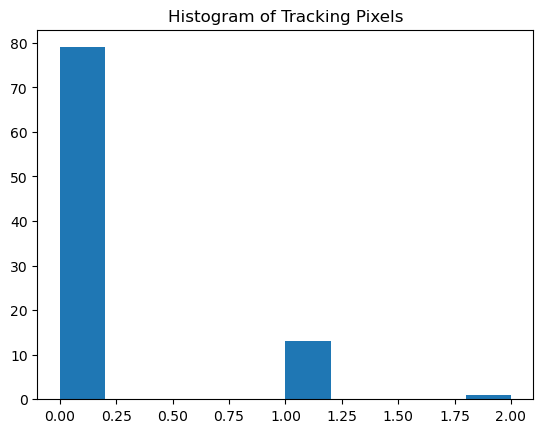

In [27]:
plt.hist(df['Tracking Pixels'])
plt.title('Histogram of Tracking Pixels')

Text(0.5, 1.0, 'Histogram of Ad Trackers')

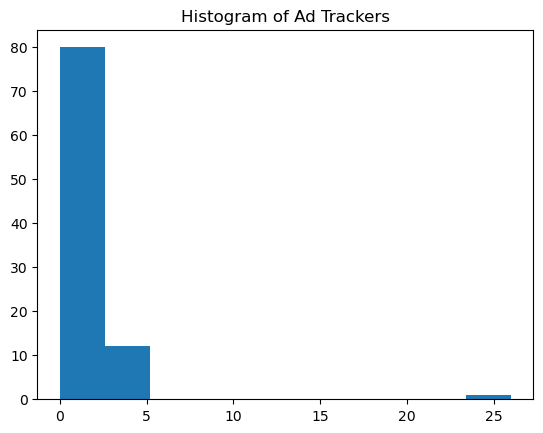

In [28]:
plt.hist(df['Ad Trackers'])
plt.title('Histogram of Ad Trackers')

From here on I filled in all NAs with 0/No to make the analysis work

In [29]:
newdf = df

In [30]:
newdf['Third Party Requests'] = newdf['Third Party Requests'].fillna(0)
newdf['Ad Counts'] = newdf['Ad Counts'].fillna(0)
newdf['First Party Cookies'] = newdf['First Party Cookies'].fillna(0)
newdf['Third Party Cookies'] = newdf['Third Party Cookies'].fillna(0)
newdf['Tracking Pixels'] = newdf['Tracking Pixels'].fillna(0)
newdf['Ad Trackers'] = newdf['Ad Trackers'].fillna(0)
newdf['Fingerprint Indicators'] = newdf['Fingerprint Indicators'].fillna('No')

In [31]:
newdf.isna().sum()

Domain Name               0
Category                  0
Third Party Requests      0
Ad Counts                 0
First Party Cookies       0
Third Party Cookies       0
Tracking Pixels           0
Ad Trackers               0
Fingerprint Indicators    0
dtype: int64

In [34]:
newdf = newdf.drop(['Fingerprint Indicators'], axis = 1)

In [35]:
newdf

,Domain Name,Category,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers
0,www.virginia.edu,Virginia University,37,0,0.0,0.0,1.0,2.0
1,www.cnu.edu,Virginia University,18,0,0.0,0.0,1.0,1.0
2,www.jmu.edu,Virginia University,8,0,0.0,0.0,0.0,1.0
3,www.longwood.edu,Virginia University,11,0,0.0,0.0,0.0,0.0
4,www.nsu.edu,Virginia University,21,0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
94,www.myflixerz.to,Pirated Streaming,6,11,0.0,0.0,0.0,0.0
95,www.viprow.nu,Pirated Streaming,3,1,0.0,1.0,1.0,0.0
96,www.vipbox.lc,Pirated Streaming,3,2,0.0,1.0,1.0,0.0
97,www.bosscast.eu,Pirated Streaming,6,16,0.0,3.0,0.0,0.0


In [36]:
print(newdf.groupby('Category').agg('mean'))

                     Third Party Requests  Ad Counts  First Party Cookies  \
Category                                                                    
Adult Content                    3.500000     15.750             0.000000   
Email                            5.000000     30.000             0.000000   
Gaming                         117.000000      8.000             0.000000   
Legal Streaming                  3.500000     42.500             0.000000   
Messaging                        6.500000     16.000             0.000000   
News                             5.333333     50.000             0.000000   
Payment Service                  7.000000     20.000             0.000000   
Pirated Streaming                5.583333     13.250             0.083333   
Research                         5.000000     12.500             1.000000   
Search Engine                   12.571429     25.000             0.142857   
Shopping                         4.500000     19.500             0.000000   

In [37]:
groupeddf = newdf.groupby('Category').agg('mean')

In [44]:
groupeddf.reset_index(inplace = True)
groupeddf

,Category,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers
0,Adult Content,3.500000,15.750,0.000000,1.500000,0.000000,0.500000
1,Email,5.000000,30.000,0.000000,4.000000,2.000000,1.000000
2,Gaming,117.000000,8.000,0.000000,2.000000,0.000000,26.000000
3,Legal Streaming,3.500000,42.500,0.000000,3.500000,0.000000,0.000000
4,Messaging,6.500000,16.000,0.000000,1.500000,0.000000,1.000000
5,News,5.333333,50.000,0.000000,4.000000,0.000000,1.666667
6,Payment Service,7.000000,20.000,0.000000,9.000000,1.000000,0.000000
7,Pirated Streaming,5.583333,13.250,0.083333,0.541667,0.166667,0.458333
8,Research,5.000000,12.500,1.000000,3.000000,0.000000,1.000000
9,Search Engine,12.571429,25.000,0.142857,3.714286,0.000000,1.000000


Text(0.5, 1.0, 'Average Third Party Requests by Category')

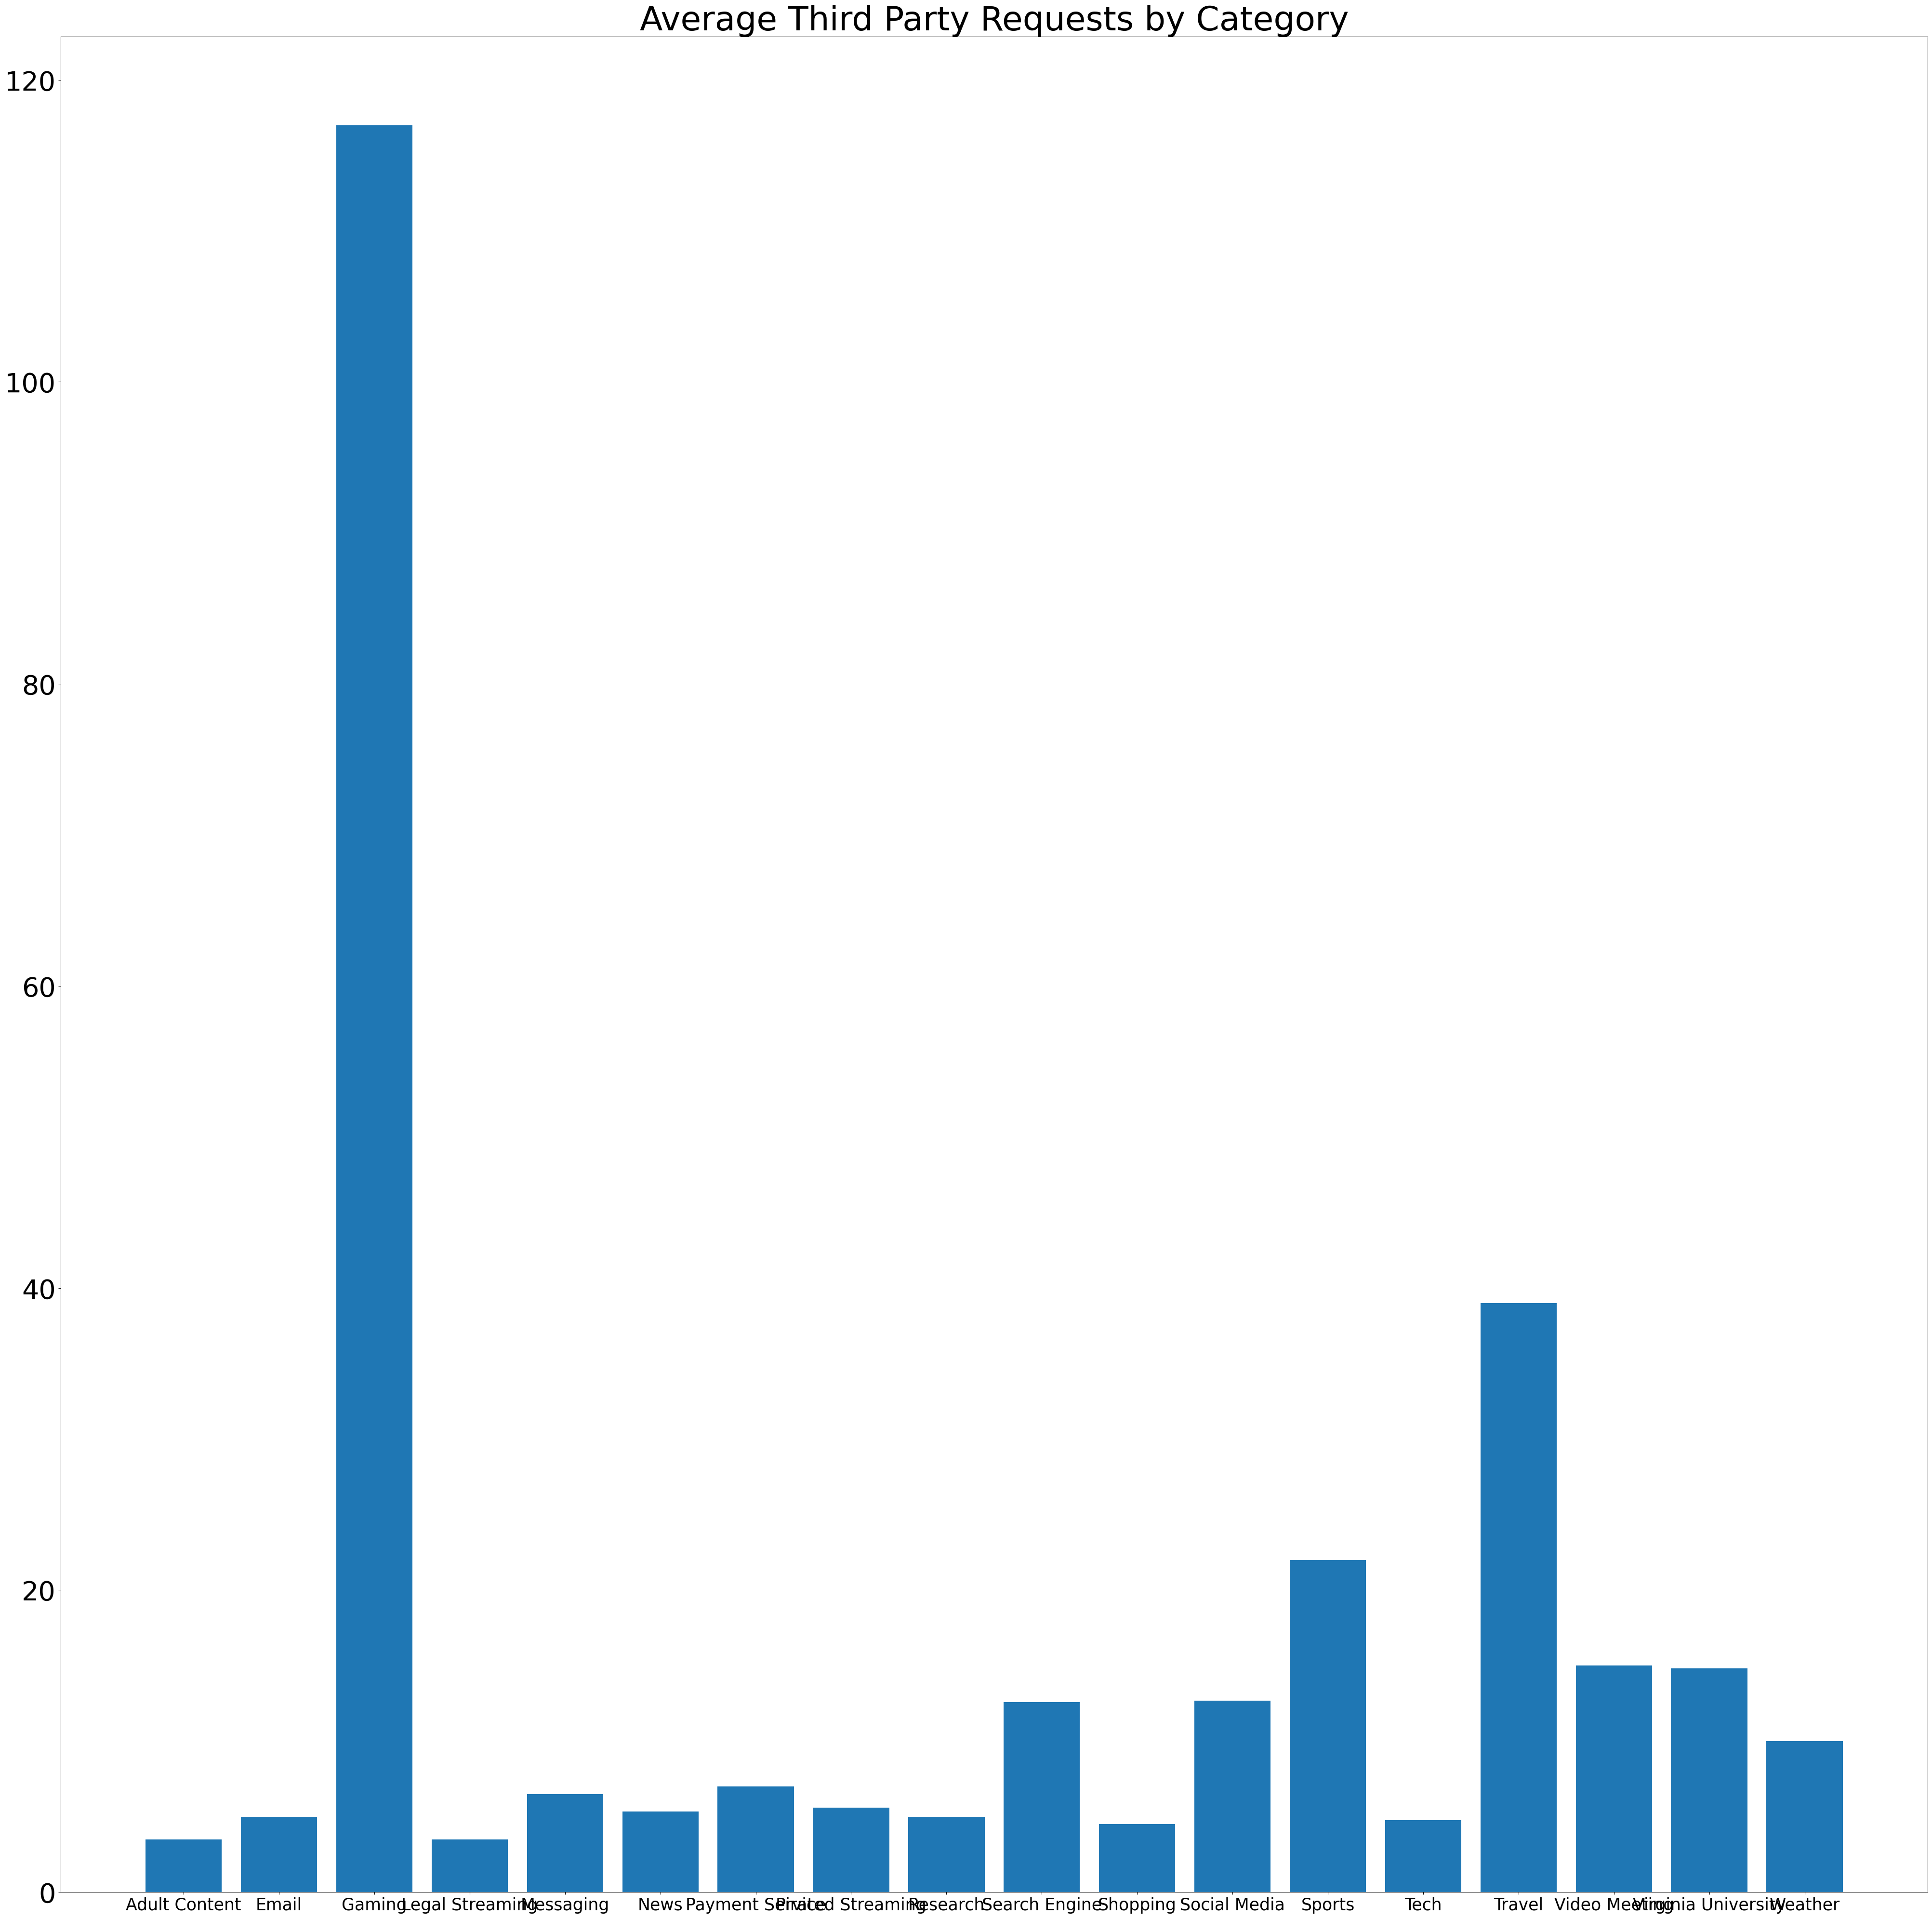

In [58]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Third Party Requests'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Third Party Requests by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Ad Counts by Category')

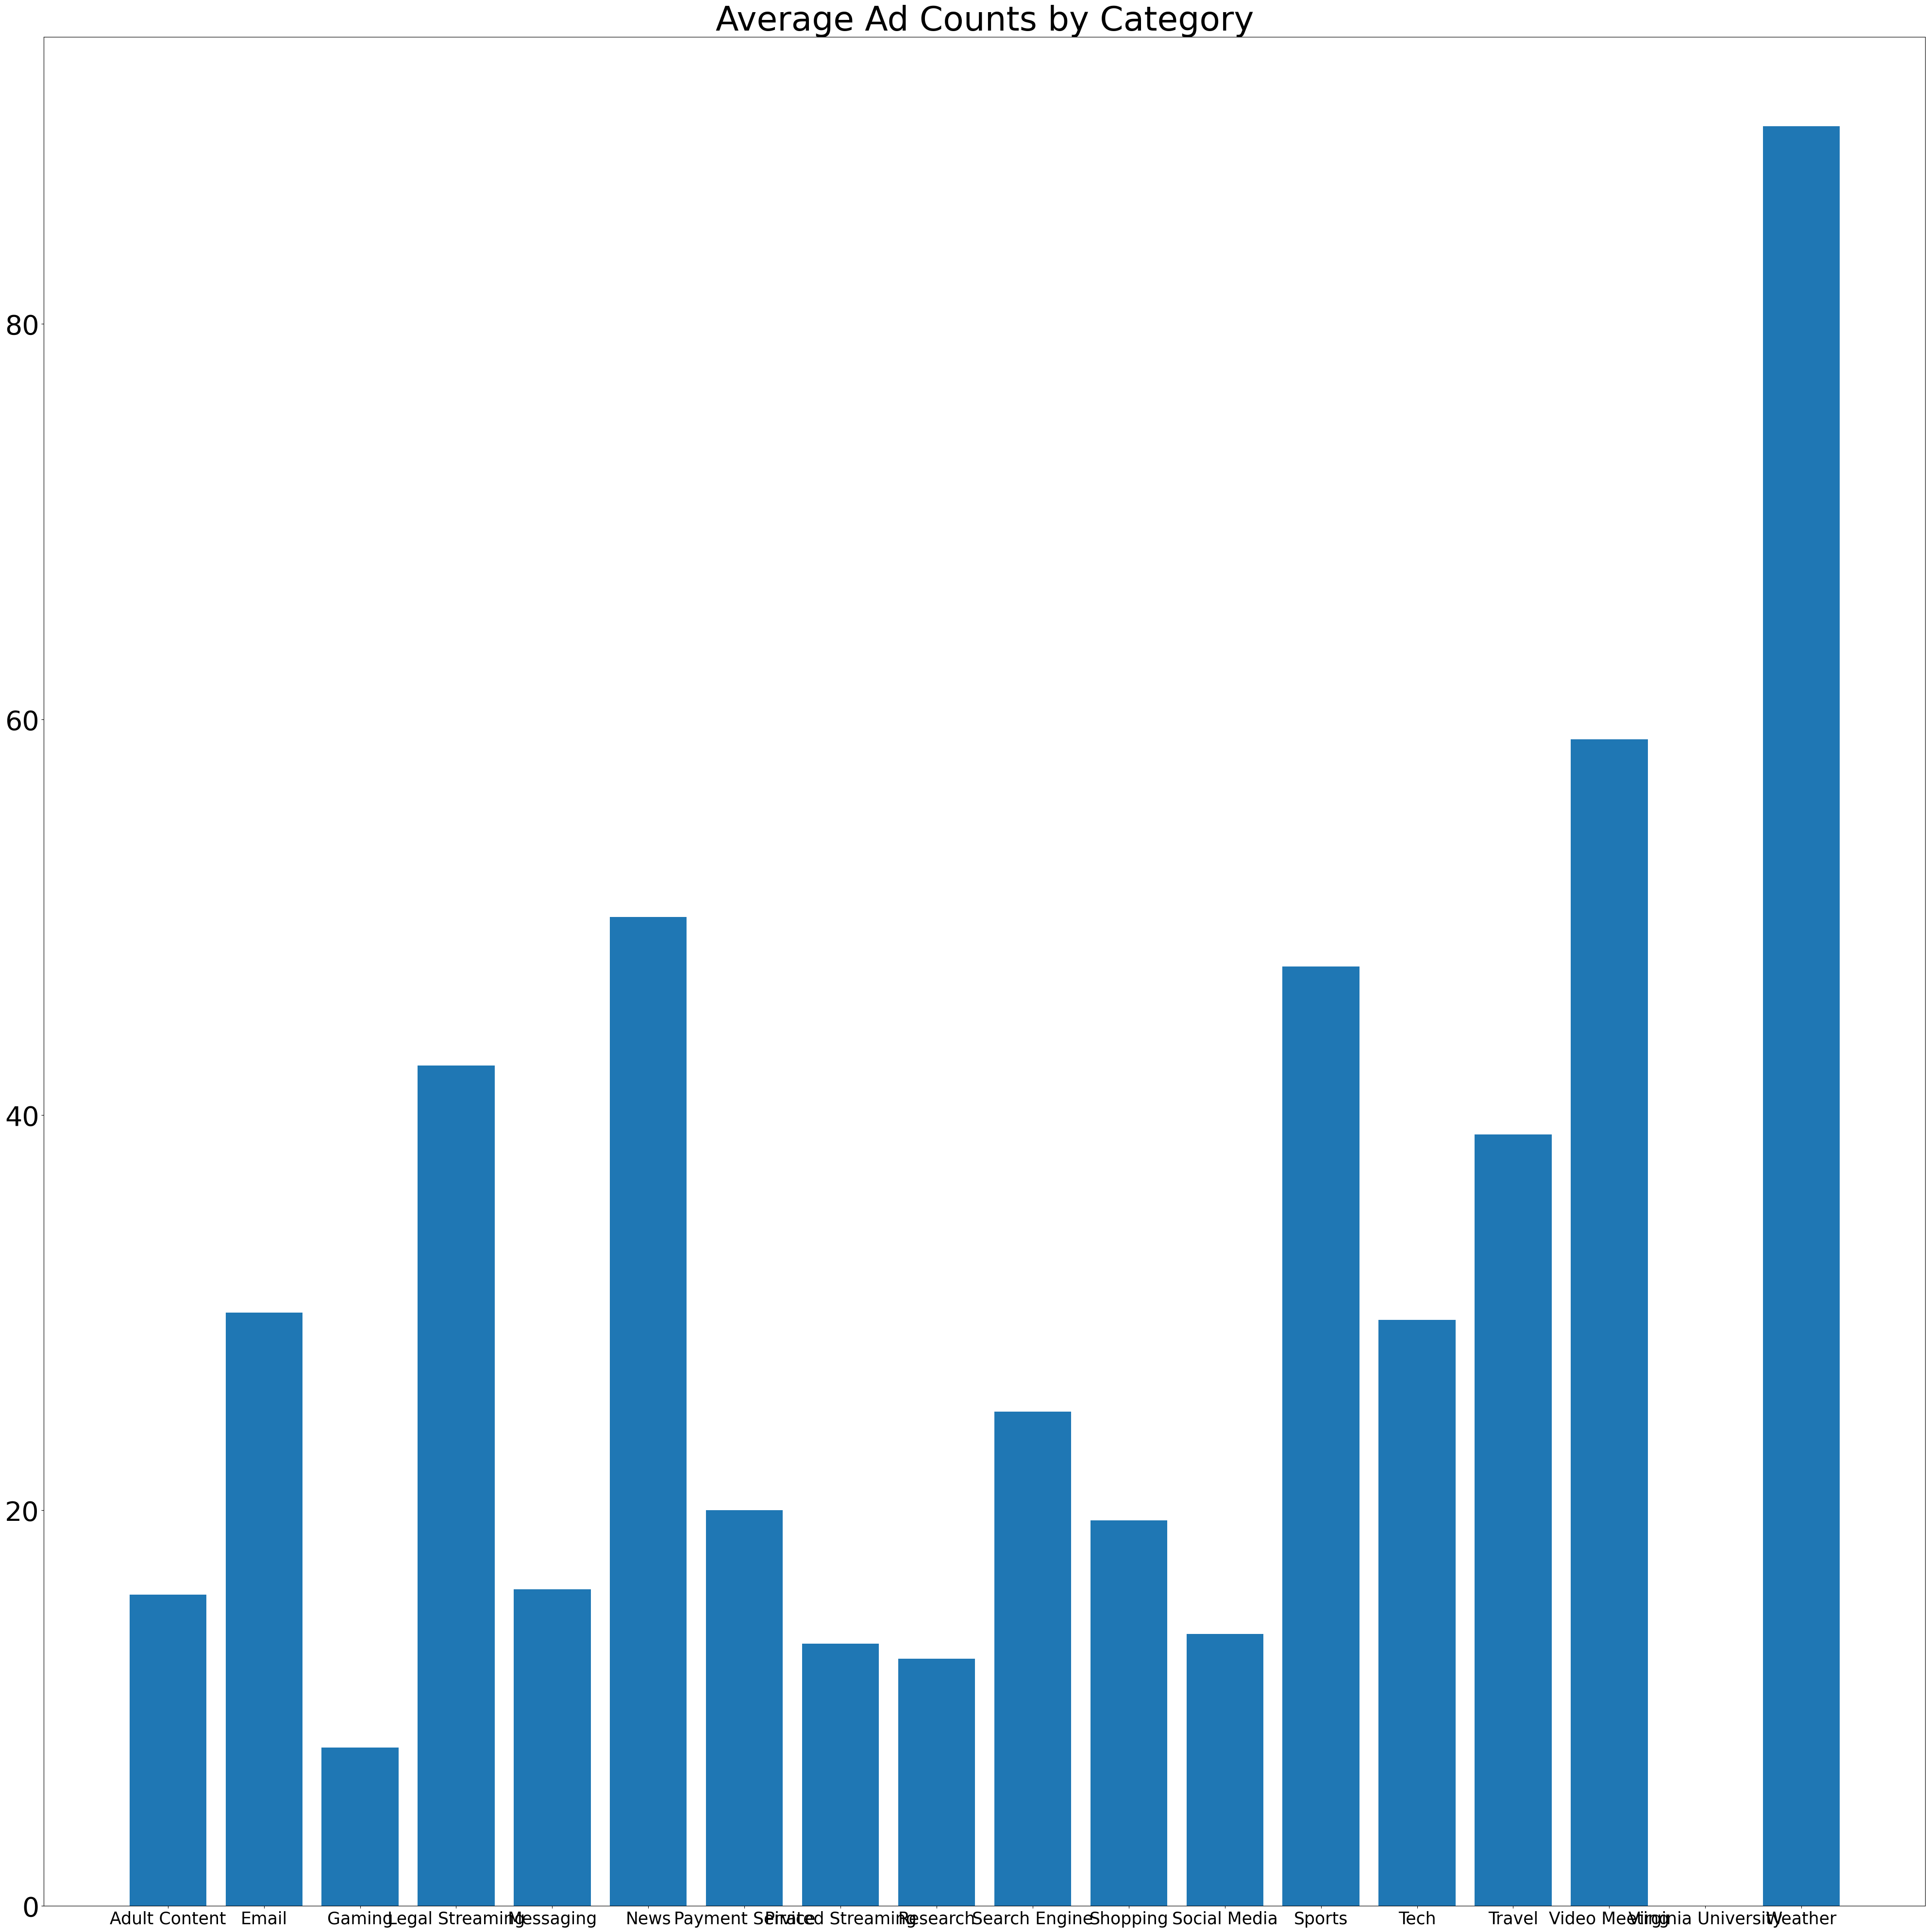

In [59]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Ad Counts'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Ad Counts by Category', fontsize = 50)

Text(0.5, 1.0, 'Average First Party Cookies by Category')

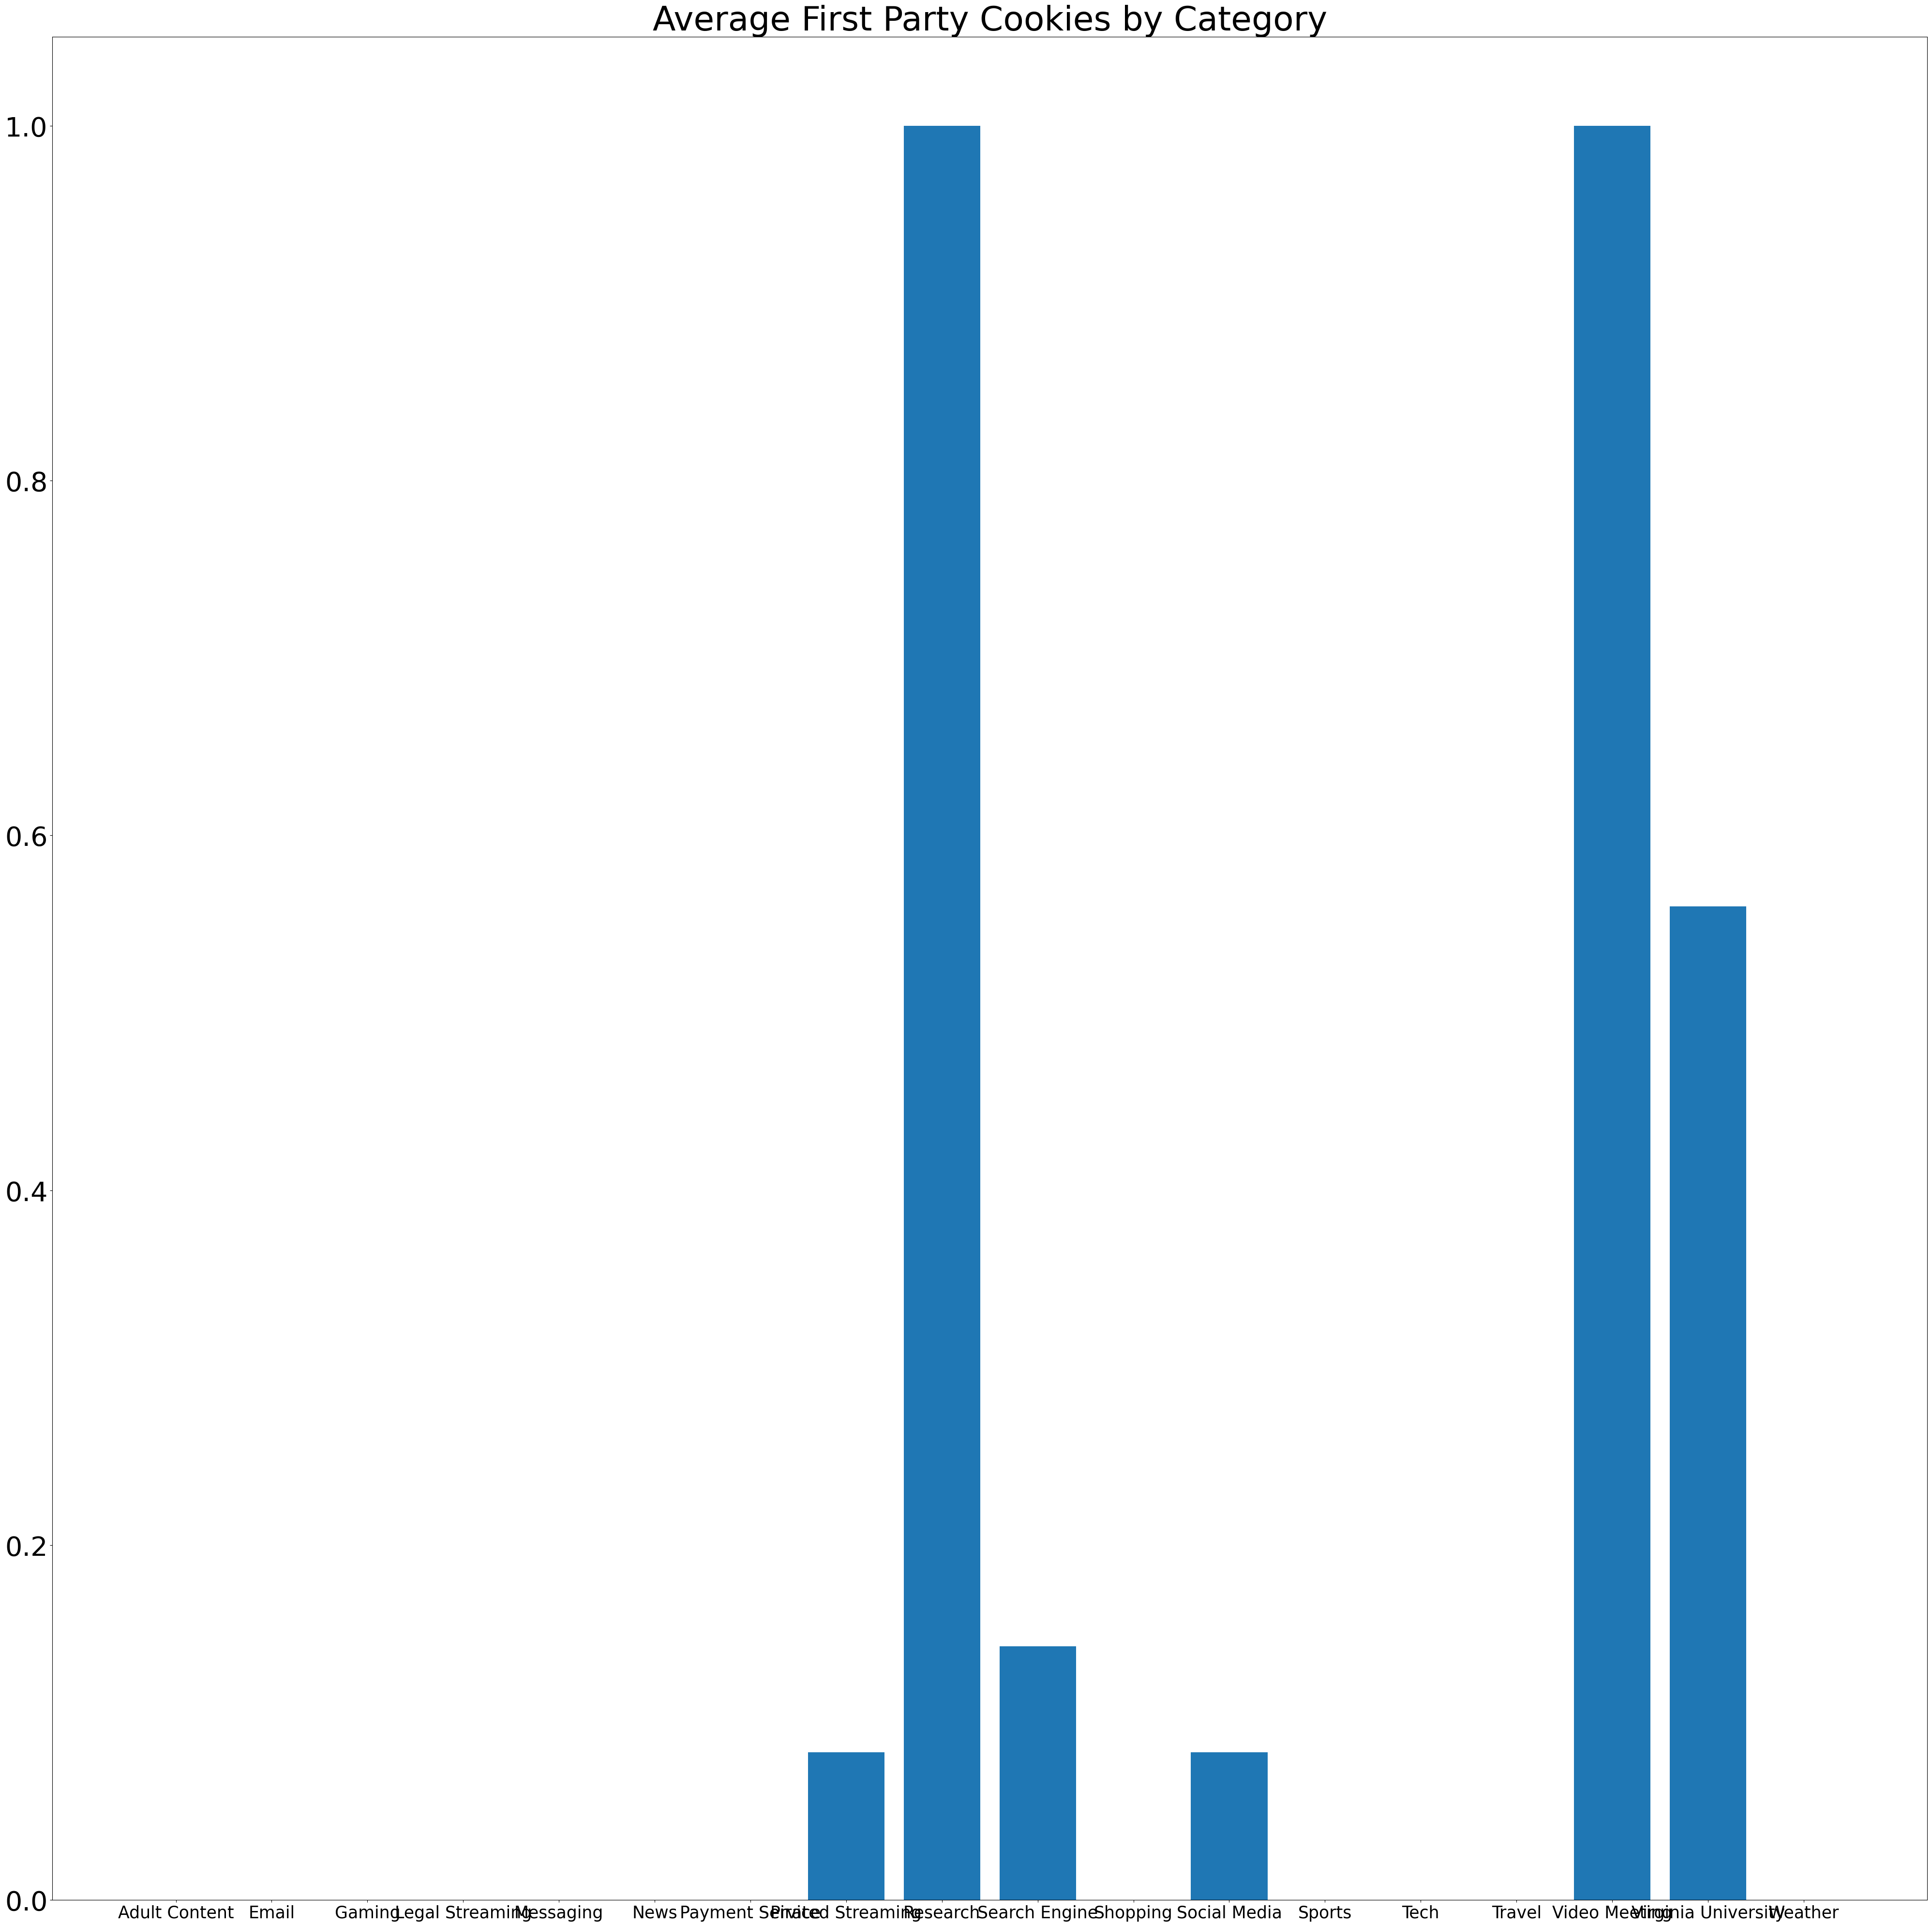

In [60]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['First Party Cookies'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average First Party Cookies by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Third Party Cookies by Category')

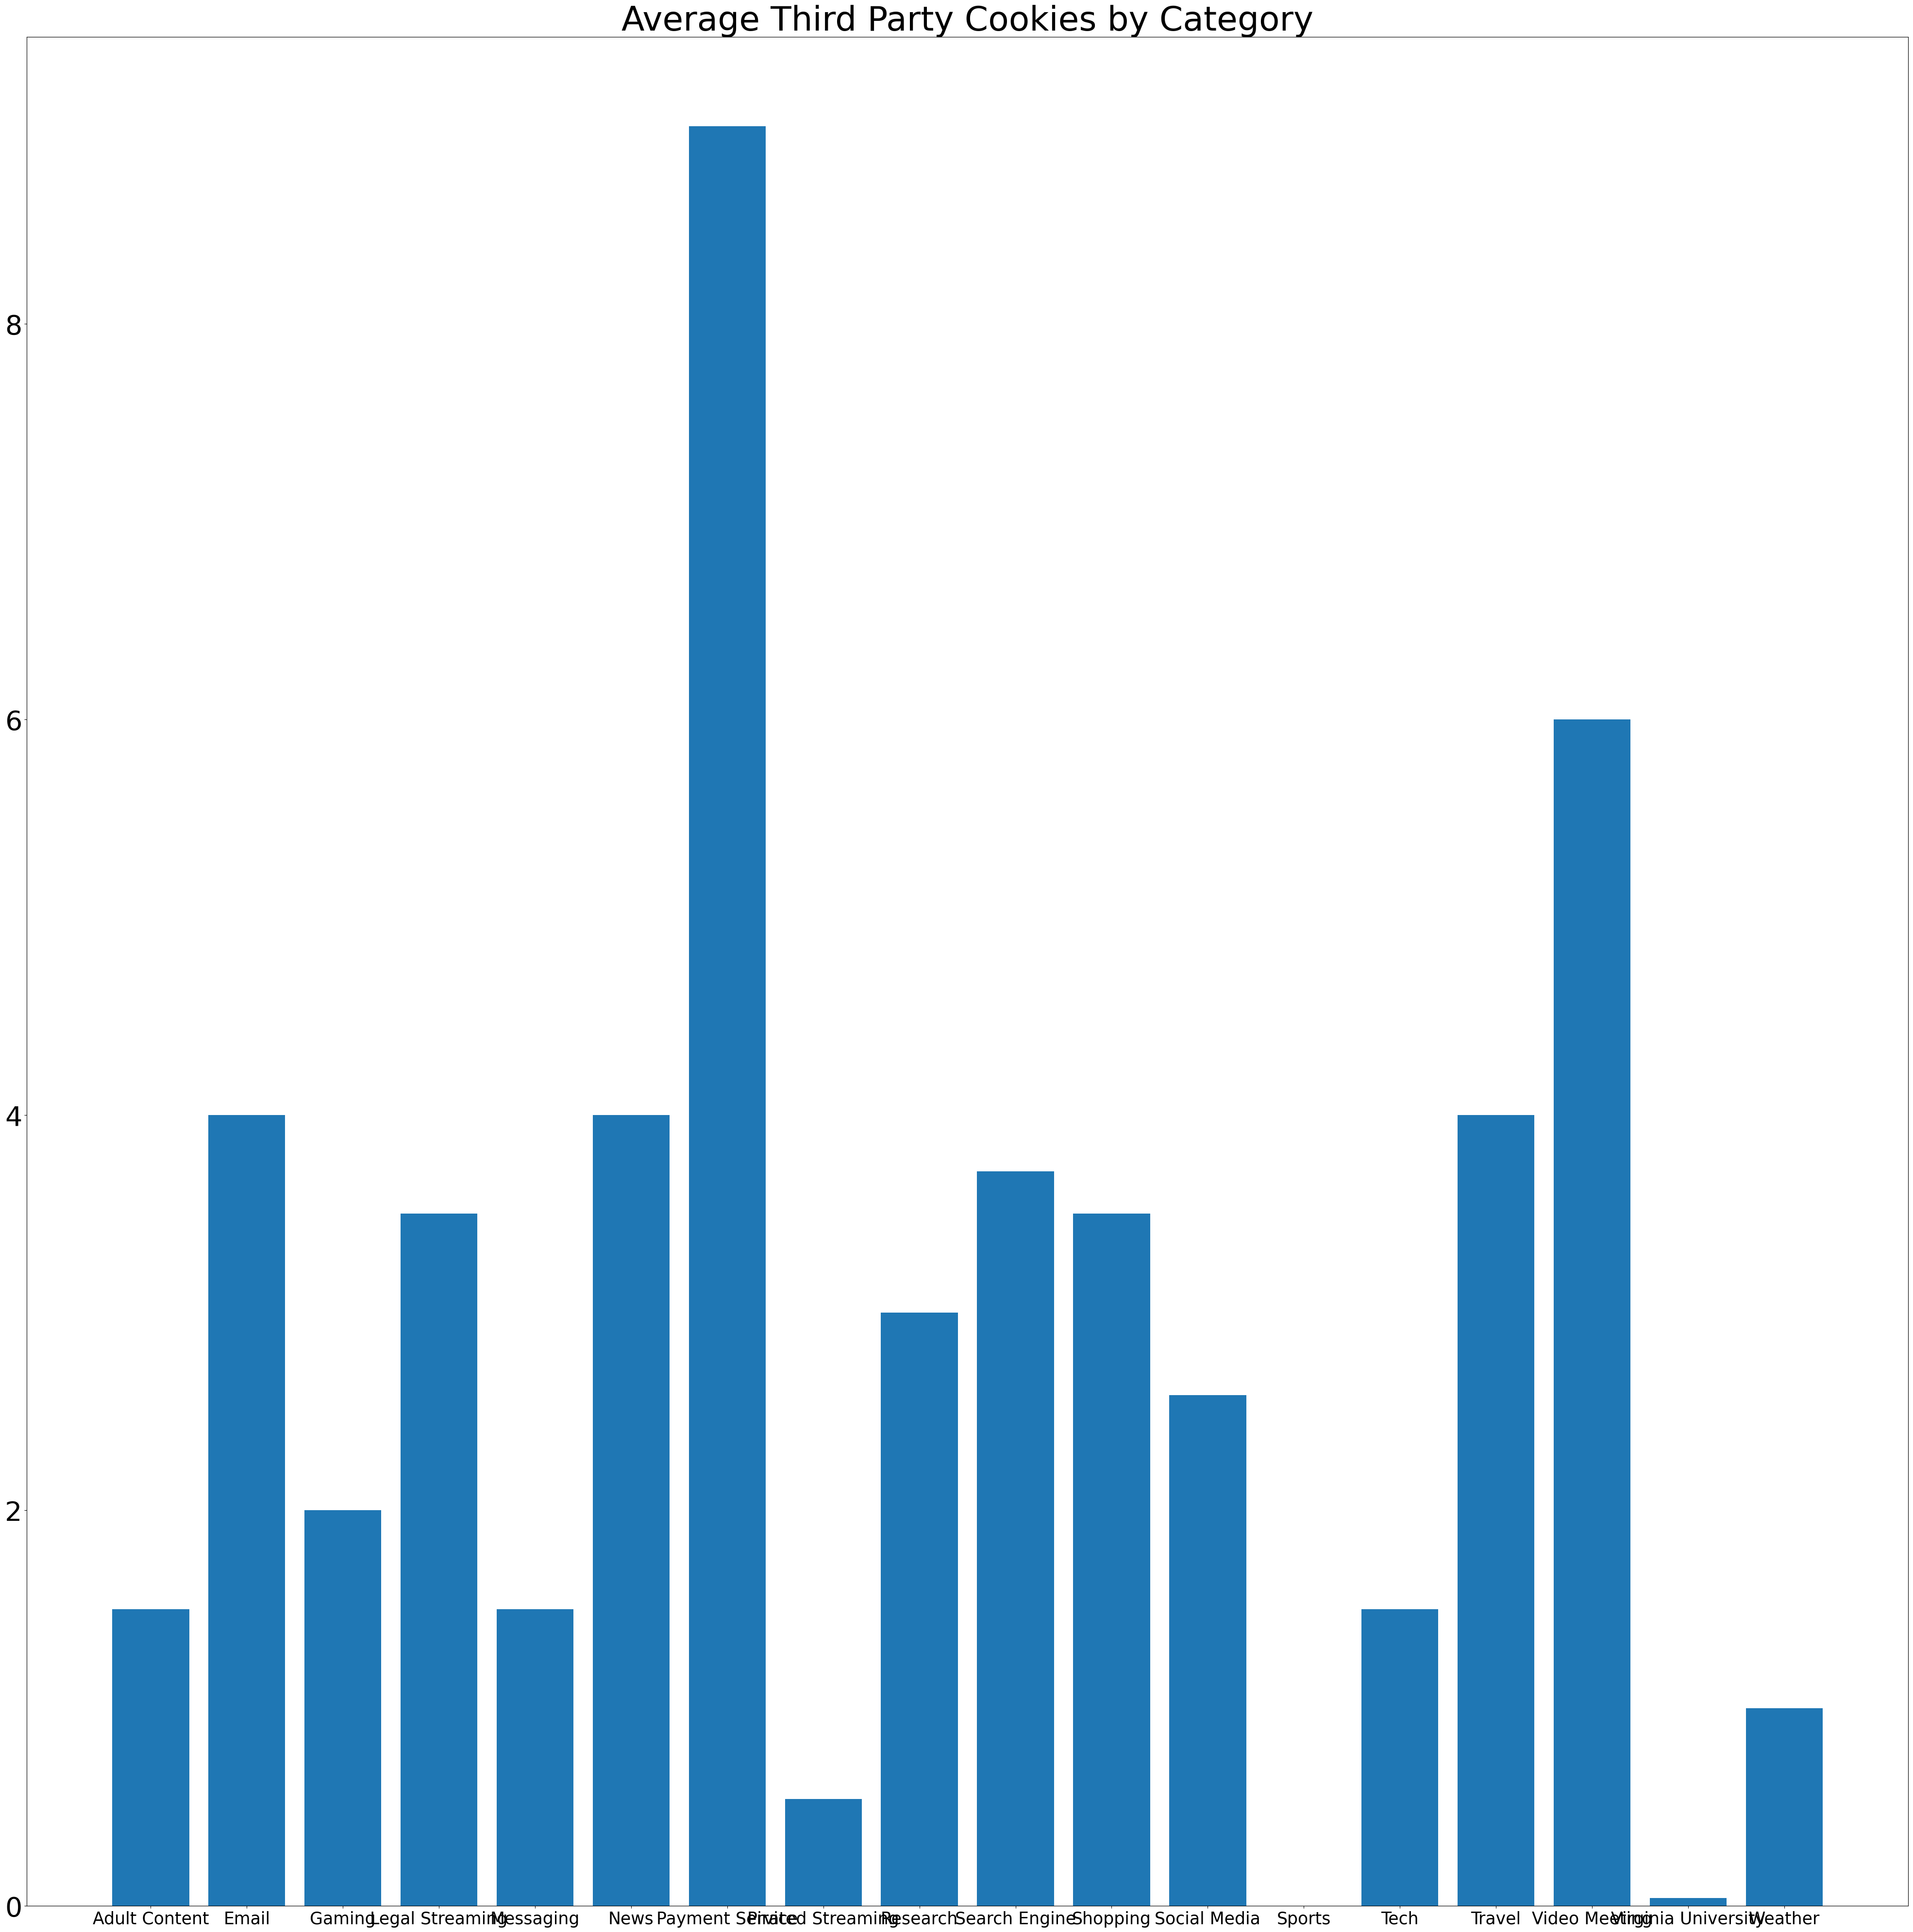

In [61]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Third Party Cookies'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Third Party Cookies by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Tracking Pixels by Category')

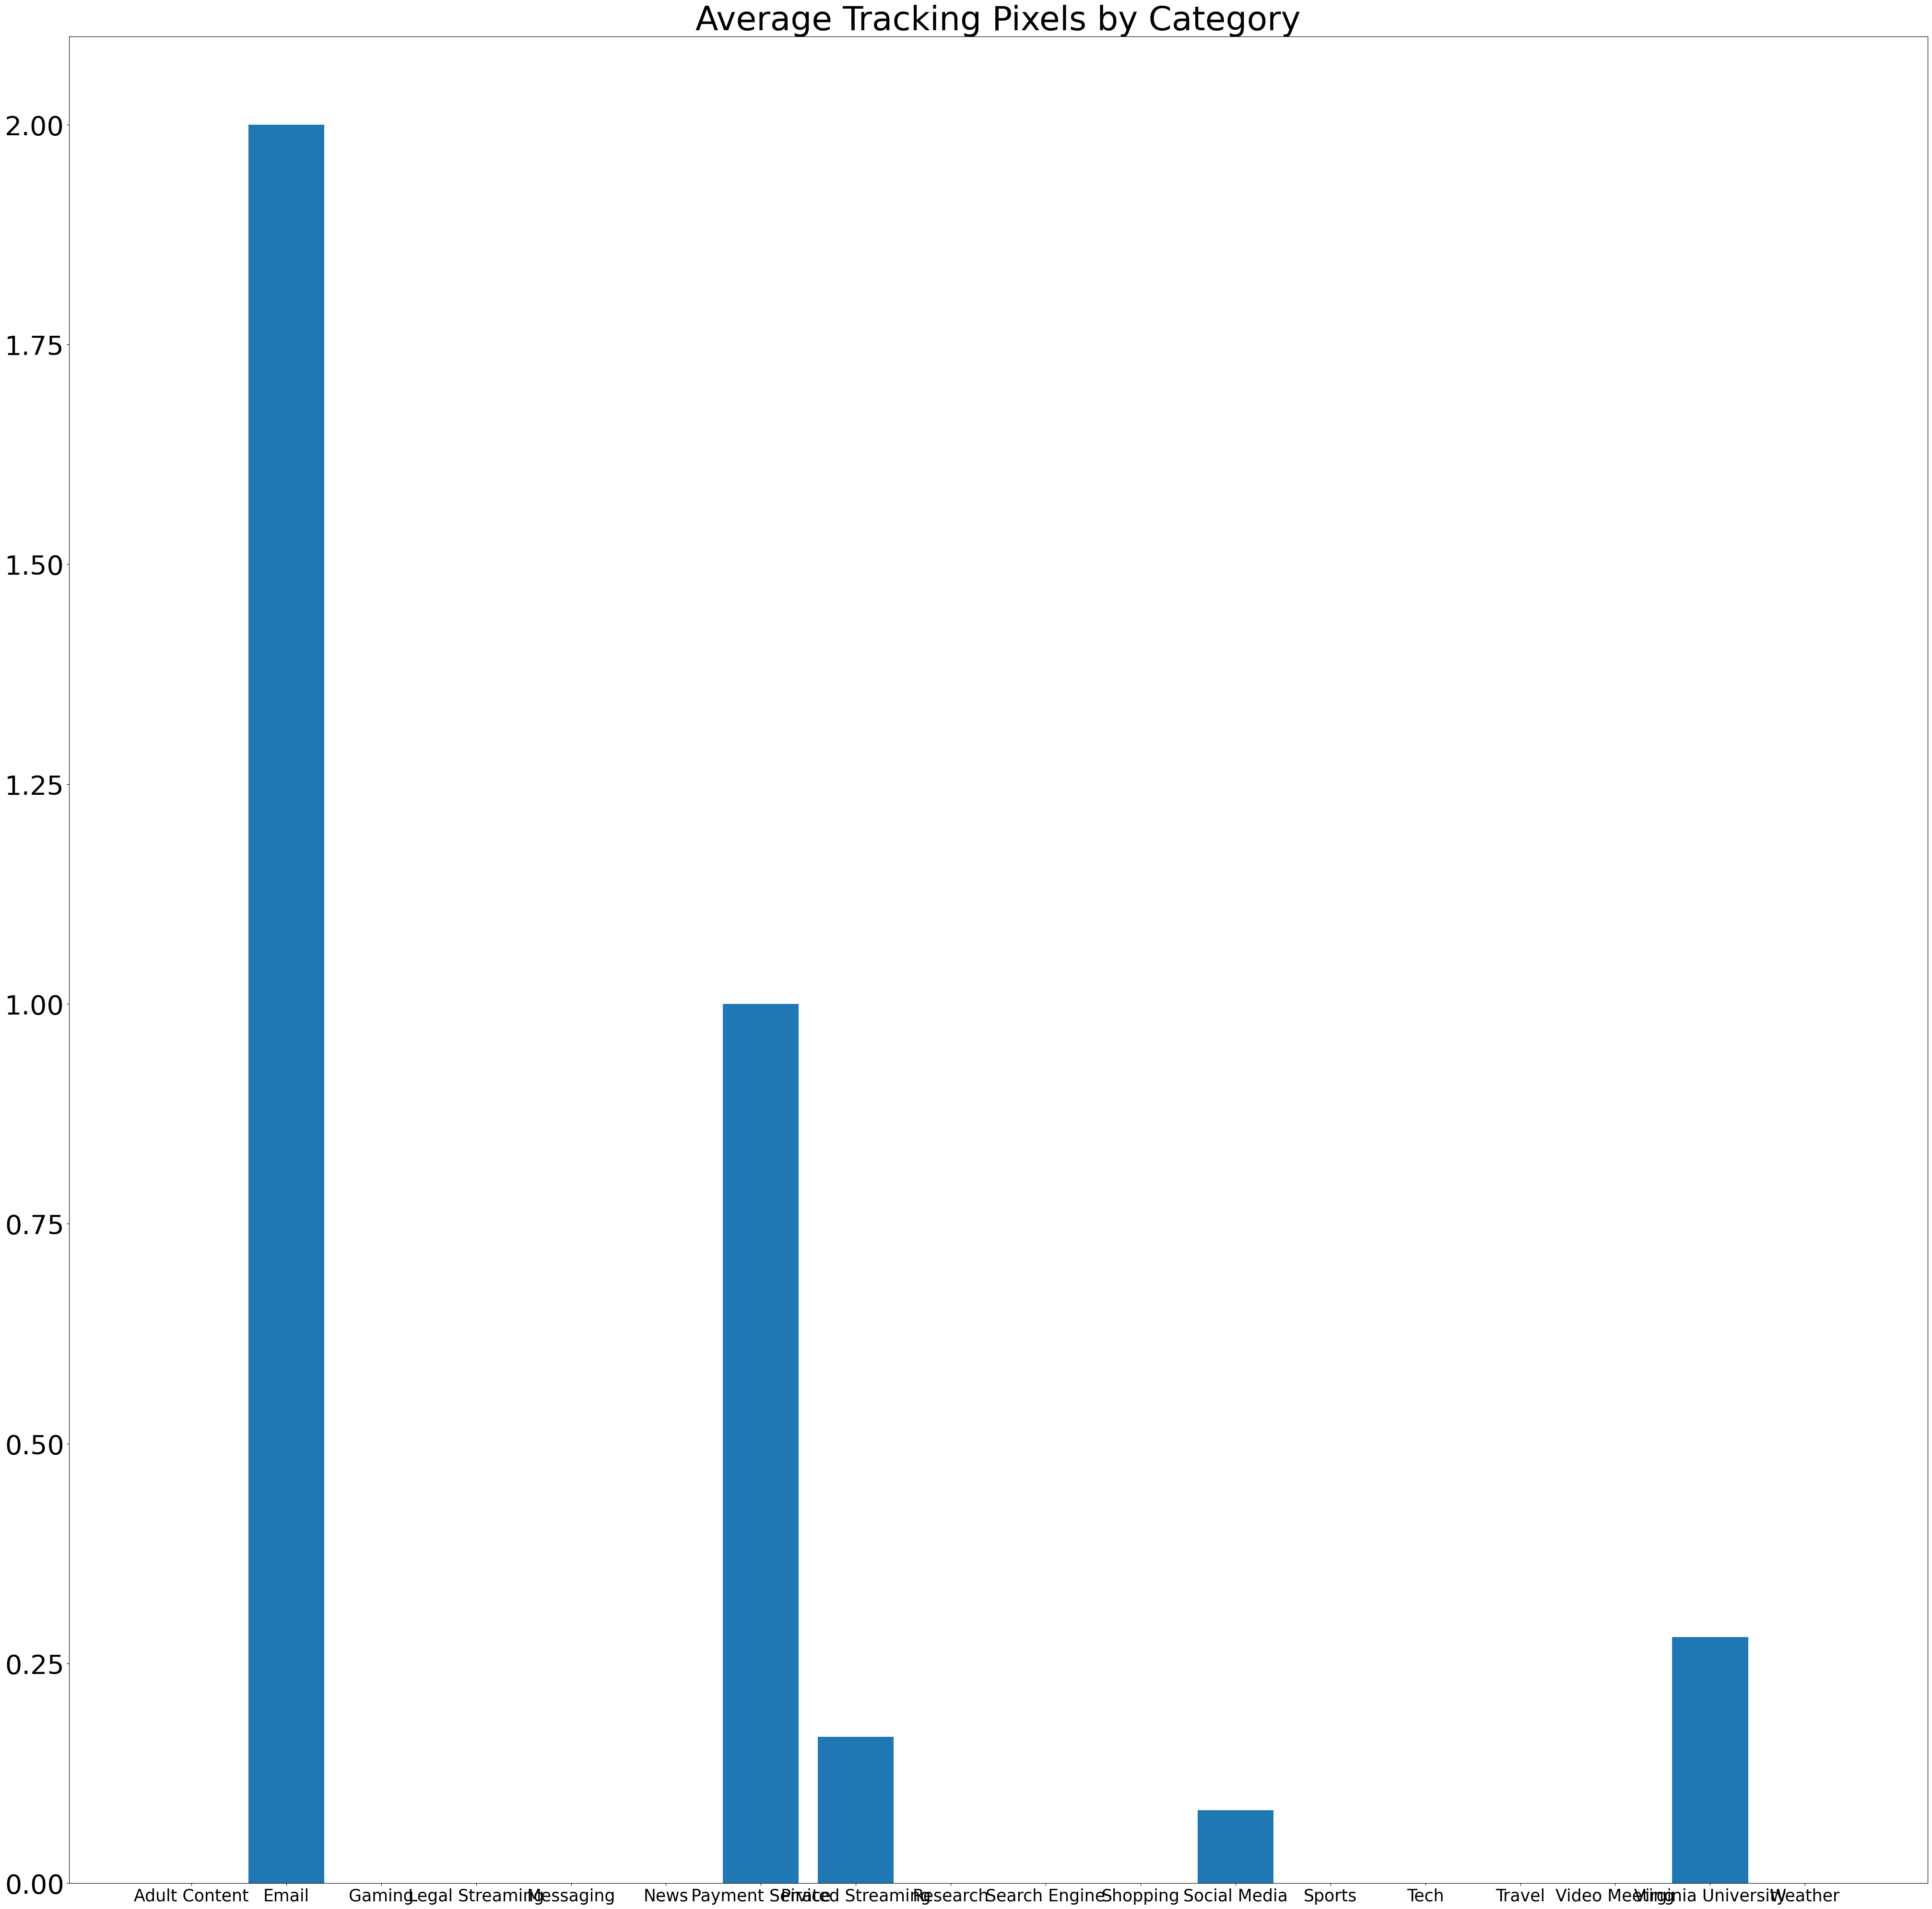

In [62]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Tracking Pixels'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Tracking Pixels by Category', fontsize = 50)

Text(0.5, 1.0, 'Average Ad Trackers by Category')

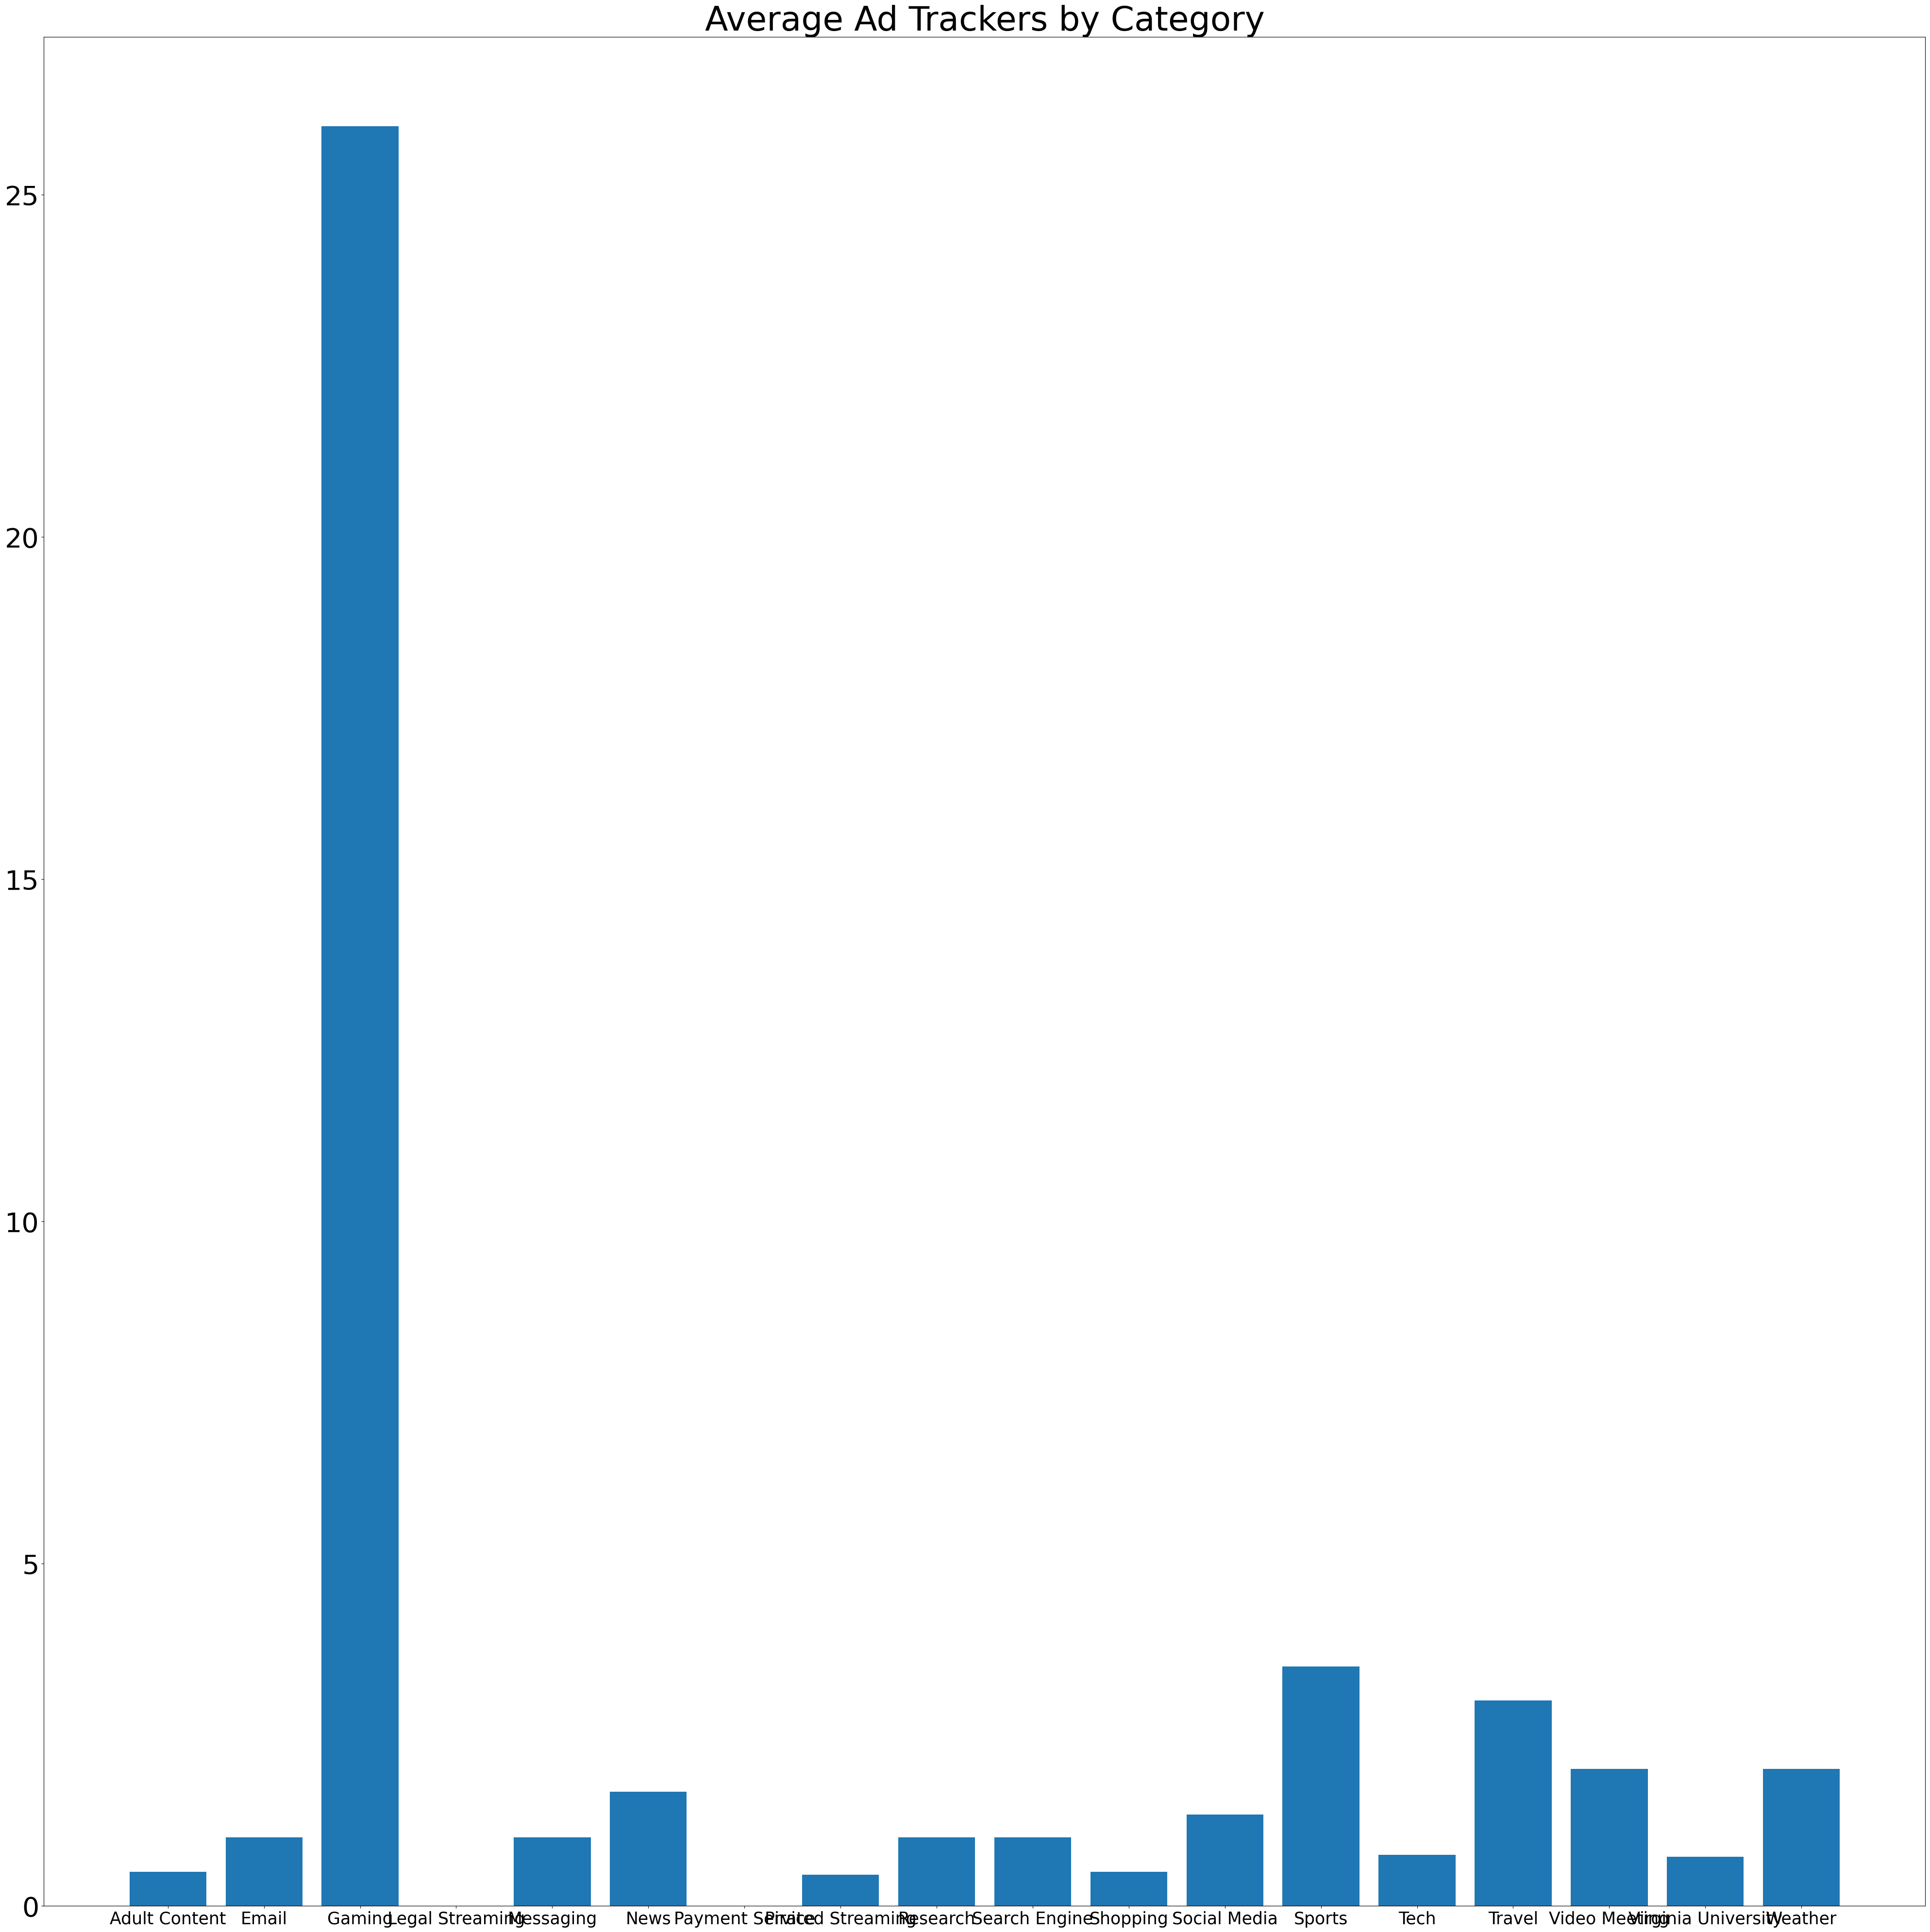

In [63]:
plt.figure(figsize = (50,50))
plt.bar(groupeddf['Category'], height = groupeddf['Ad Trackers'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 40)
plt.title('Average Ad Trackers by Category', fontsize = 50)

In [64]:
newdf.corr()

,Third Party Requests,Ad Counts,First Party Cookies,Third Party Cookies,Tracking Pixels,Ad Trackers
Third Party Requests,1.000000,0.026722,0.005569,0.007165,-0.010453,0.828012
Ad Counts,0.026722,1.000000,-0.125601,0.145766,-0.170636,0.119638
First Party Cookies,0.005569,-0.125601,1.000000,-0.026833,0.095976,-0.040497
Third Party Cookies,0.007165,0.145766,-0.026833,1.000000,-0.008075,0.019806
Tracking Pixels,-0.010453,-0.170636,0.095976,-0.008075,1.000000,-0.083321
Ad Trackers,0.828012,0.119638,-0.040497,0.019806,-0.083321,1.000000
